In [141]:
# DBScan: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import numpy as np

In [142]:
X, y = make_moons(n_samples=100)

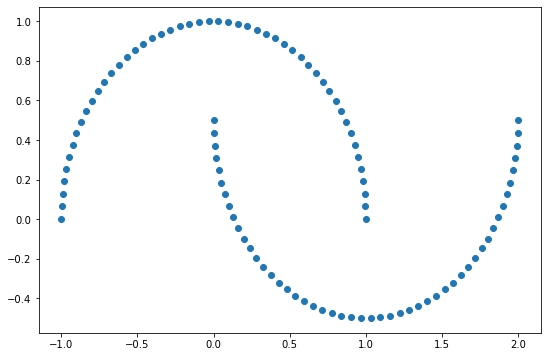

In [143]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

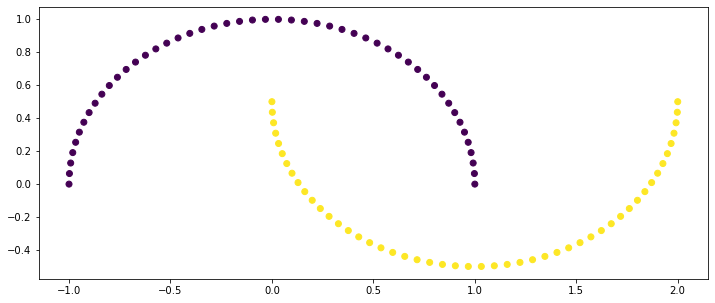

In [144]:
# Classify data using DBSCAN (from sklearn)
# Plot results with corresponding colors

cluster = DBSCAN(min_samples=3, eps=0.5) 
y_pred = cluster.fit_predict(X)


plt.figure(figsize=(12,5))
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [145]:
np.random.seed(42)
X, _ = make_blobs(n_samples=1000,
                  centers=15,
                  n_features=2,
                  cluster_std=np.random.uniform(low=0.5, high=1.2, size=(15)),
                  random_state=42)

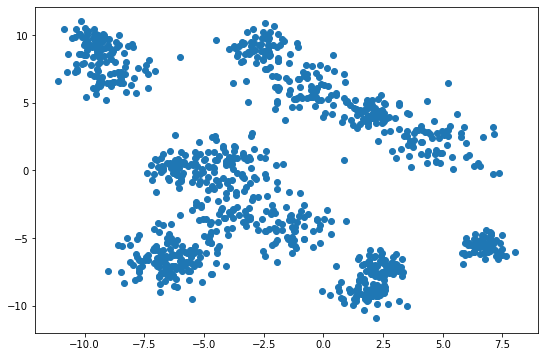

In [146]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [147]:
# Find best eps value using the Elbow-method and plot results
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

## Nearest Neigbours

In [155]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

Text(0.5, 1.0, 'The Elbow Method for best eps')

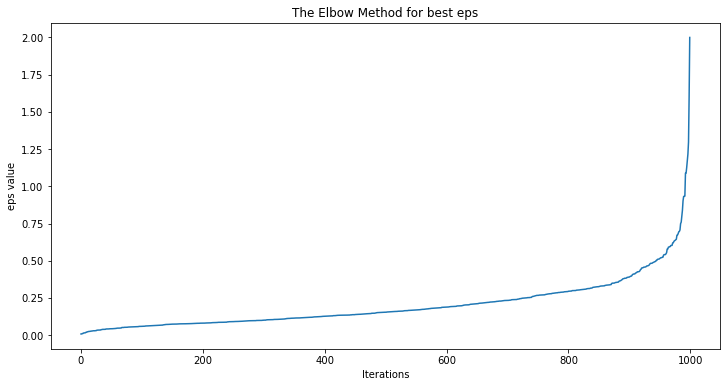

In [156]:
plt.figure(figsize=(12,6))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Iterations')
plt.ylabel('eps value')
plt.title('The Elbow Method for best eps')

## Silhouette score

In [211]:
db = DBSCAN(eps=0.6, min_samples=2).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))

Estimated number of clusters: 21
Estimated number of noise points: 32
Silhouette Coefficient: 0.122


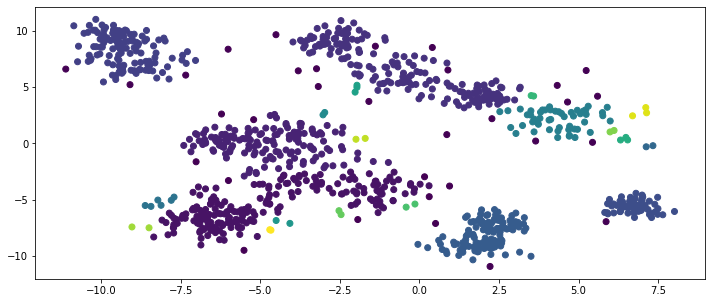

In [212]:
# Classify data using DBSCAN (from sklearn)
# Plot results with corresponding colors

cluster = DBSCAN(min_samples=2, eps=0.6) 
y_pred = cluster.fit_predict(X)


plt.figure(figsize=(12,5))
plt.scatter(X[:,0], X[:,1], c=y_pred)